<a href="https://colab.research.google.com/github/Nathlima1700/biblioteca_pandas/blob/main/RID_212818_DESAFIO04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving MKT.csv to MKT (11).csv
Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
None


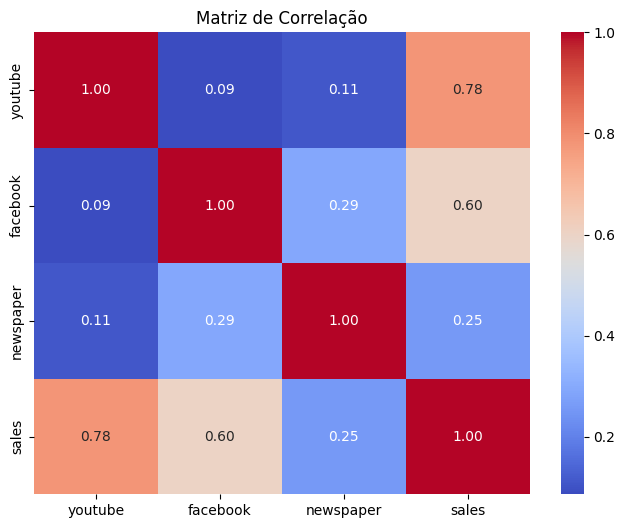

In [18]:
# CONSTRUINDO UM MODELO DE REGRESSÃO LINEAR PARA MARKETING
# ANÁLISE DESCRITIVA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados (Lê o arquivo csv do seu computador)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('MKT.csv')

# Análise Descritiva (Exibe informações sobre o dataset)
print("Informações do Dataset:")
print(df.info())  # Verifica tipos e valores nulos

# Exibir as primeiras 5 linhas do dataset
df.head()

# Estatísticas descritivas das variáveis numéricas
df.describe()

# Verificar valores ausentes em cada coluna
df.isnull().sum()

# Contar registros duplicados
df.duplicated().sum()

# Remover duplicatas, se houver
df = df.drop_duplicates()

# Matriz de correlação
correlation_matrix = df.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Resultado dessa correlação:
# Com base nesse heatmap,os investimentos no YouTube e no Facebook parecem ser os mais relevantes para impulsionar as vendas.
# Já os investimentos em jornal têm um impacto bem menor.


<Figure size 1200x500 with 0 Axes>

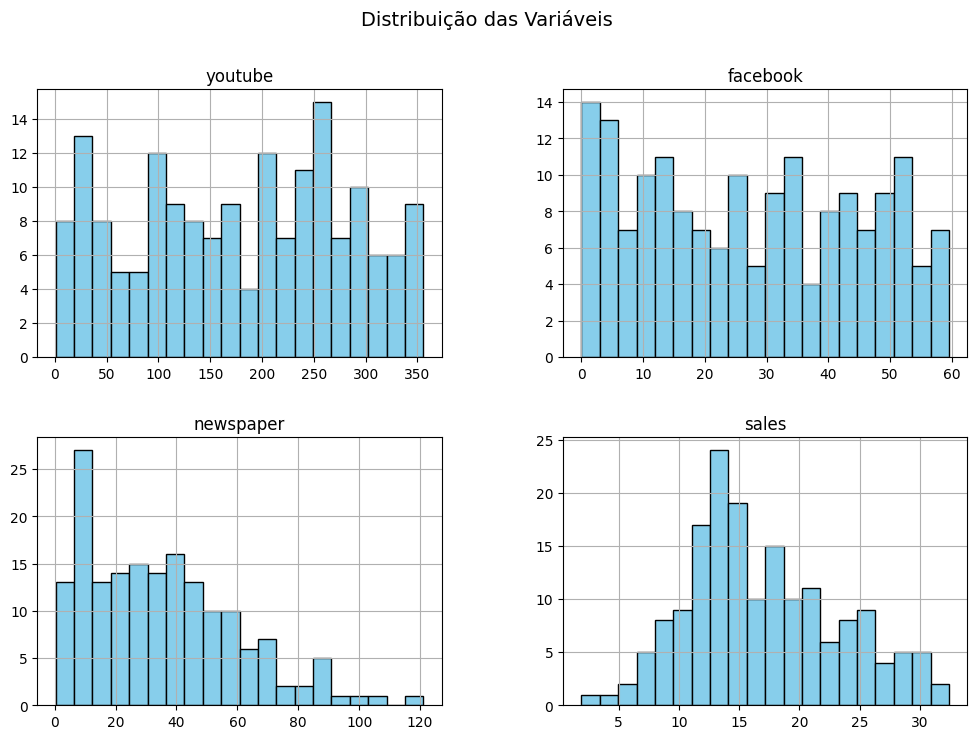

In [20]:
# ANÁLISE EXPLORATÓRIA

# Passo 1:Visualizar a distribuição das variáveis
plt.figure(figsize=(12, 5))

# Histograma para cada variável
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis", fontsize=14)
plt.show()


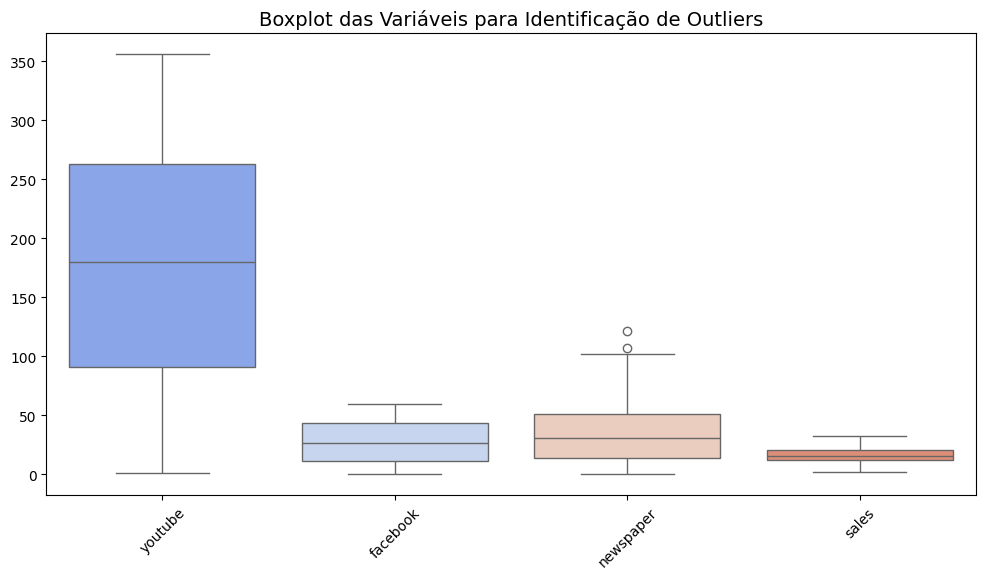

In [21]:
# ANÁLISE EXPLORATÓRIA

# Passo 2: Boxplots para Identificar Outliers
# Criando boxplots para cada variável
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, palette="coolwarm")
plt.title("Boxplot das Variáveis para Identificação de Outliers", fontsize=14)
plt.xticks(rotation=45)
plt.show()


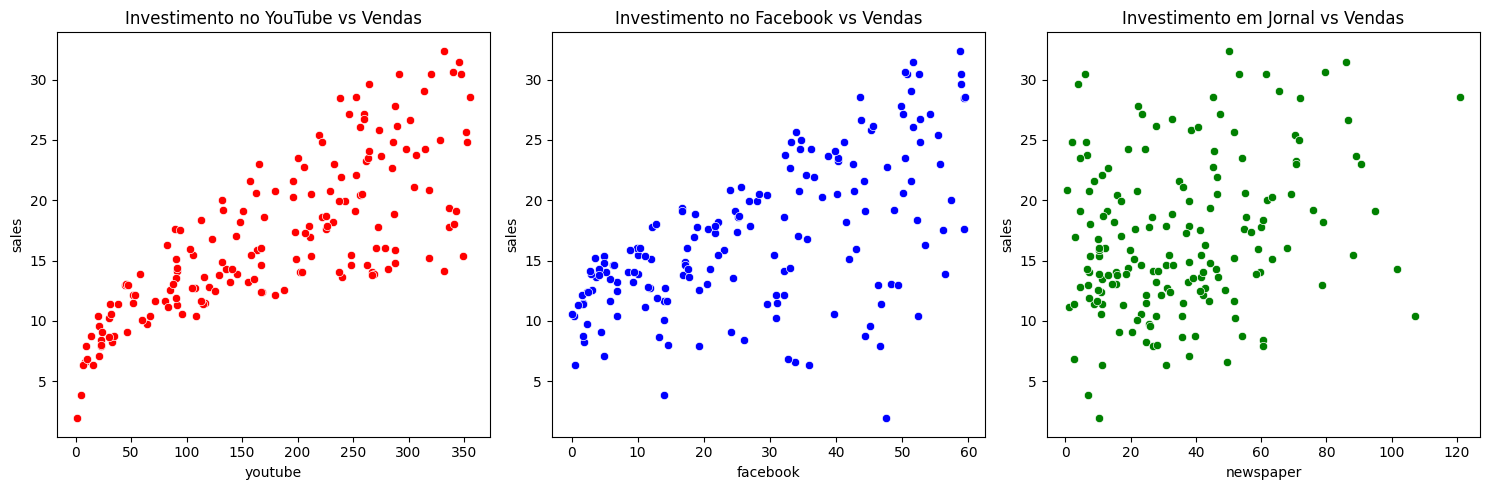

In [23]:
# ANÁLISE EXPLORATÓRIA

# Passo 3: Relação entre Investimentos e Vendas
# Criando scatter plots para analisar a relação entre investimentos e vendas
plt.figure(figsize=(15, 5))

# Youtube vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['youtube'], y=df['sales'], color='red')
plt.title("Investimento no YouTube vs Vendas")

# Facebook vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['facebook'], y=df['sales'], color='blue')
plt.title("Investimento no Facebook vs Vendas")

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['newspaper'], y=df['sales'], color='green')
plt.title("Investimento em Jornal vs Vendas")

plt.tight_layout()
plt.show()



In [30]:
# MODELAGEM DE REGRESSÃO LINEAR

# Importar as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir as variáveis preditoras (X) e a variável resposta (y)
X = df[['youtube', 'facebook', 'newspaper']]  # Variáveis independentes
y = df['sales']  # Variável dependente (o que queremos prever)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Criar e treinar o modelo
# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com os dados de treino
modelo.fit(X_train, y_train)

#Avaliar o desempenho do modelo
# Fazer previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Exibir os resultados
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

#Conclusão da modelagem
# O modelo tem um bom desempenho, pois 87% das variações nas vendas são explicadas pelos investimentos.
# O erro médio (MAE de 1.40 e RMSE de 2.36) sugere que a previsão está relativamente precisa.

Erro Médio Absoluto (MAE): 1.40
Erro Quadrático Médio (MSE): 5.58
Raiz do Erro Quadrático Médio (RMSE): 2.36
Coeficiente de Determinação (R²): 0.87


In [32]:
# CALCULÇANDO A PREDIÇÃO - FAZENDO PREVISÕES
# Criando um novo investimento (exemplo: Youtube: 200, Facebook: 150, Newspaper: 100)
novo_investimento = np.array([[200, 150, 100]])

# Fazendo a previsão de vendas
previsao = modelo.predict(novo_investimento)

print(f'Previsão de vendas para o novo investimento: {previsao[0]:.2f}')

Previsão de vendas para o novo investimento: 41.71


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
